In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.metrics import max_error
from tabulate import tabulate
%matplotlib inline

##### Load data set
##### Values converts it into a numpy array
##### -1 means that calculate the dimension of rows, but have 1 column

In [2]:
data_train = pd.read_csv('Dataset_1_train.csv')  # load data set
X_train = data_train.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y_train = data_train.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

In [3]:
data_valid = pd.read_csv('Dataset_1_valid.csv')  # load data set
X_valid = data_valid.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y_valid = data_valid.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

##### Creating a polynomial regression model for the given degree (0 - 20).
##### Transforms the existing features to higher degree features.
##### Fit the transformed features to the model
##### As we can see from the plot on the curve has flattened on degree 4.

[67.67200232257454, 29.503012193066315, 16.715898205749394, 13.602866149748168, 10.268766663715509, 9.775806742026806, 9.428240988342887, 9.338281130136881, 9.241439747904101, 9.243396786228056, 9.538261804540022, 9.52588321563646, 9.43429732344612, 9.434988667437702, 9.390132320711, 9.39391010008722, 9.372869293708726, 9.376618307335507, 9.368240796887141, 9.371199606156136, 9.369608039899388]


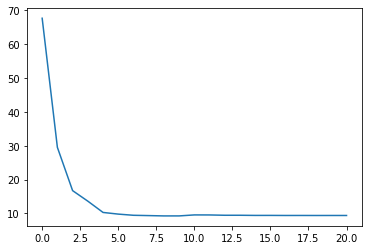

In [4]:
mse_train_list = []
for deg in range(21):
    X_transformed = PolynomialFeatures(degree=deg).fit_transform(X_train)
    model = RidgeCV()
    model.fit(X_transformed, Y_train)
    y_pred_train = model.predict(X_transformed)
#     print(y_pred_train)
    mse_train = mean_squared_error(Y_train, y_pred_train)
#     print(mse_train)
    mse_train_list.append(mse_train)

print(mse_train_list)
plt.plot(mse_train_list)
plt.show()

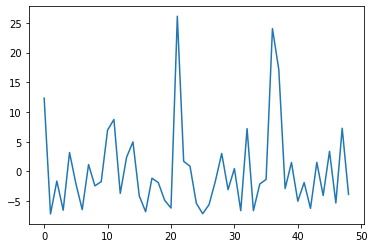

In [5]:
plt.plot(y_pred_train)

##### As we can see on the curve above has flattened on degree 4

[92.46259951483601, 27.75494125900102, 19.255377862338253, 10.06798230957992, 8.332943679586915, 8.055757471294404, 7.820981623731559, 7.792631592844156, 7.745191243543575, 7.749552057147573, 7.741017334655956, 7.746004280188696, 7.745497477108961, 7.747437097657477, 7.747734767971576, 7.747827694581975, 7.747838141528136, 7.7473695357420915, 7.747267251518266, 7.746880896168583, 7.746859353853519]


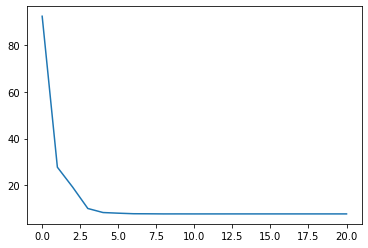

In [6]:
mse_valid_list = []
for deg_val in range(21):
    Y_transformed = PolynomialFeatures(degree=deg_val).fit_transform(X_valid)
    model = RidgeCV()
    model.fit(Y_transformed, Y_valid)
    y_pred_valid = model.predict(Y_transformed)
#     print(y_pred_valid)
    mse_valid = mean_squared_error(Y_valid, y_pred_valid)
#     print(mse_valid)
    mse_valid_list.append(mse_valid)

print(mse_valid_list)
plt.plot(mse_valid_list)

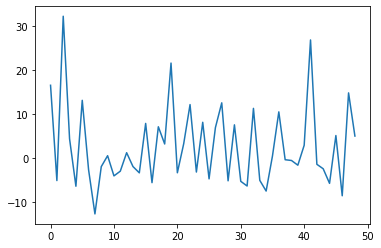

In [7]:
plt.plot(y_pred_valid)

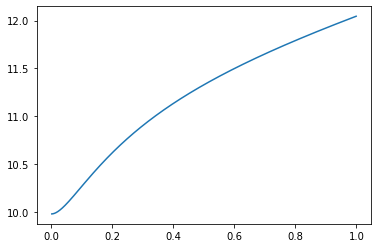

In [8]:
mse_train_list = []
alpha_values = []
for alpha in np.arange(0.001,1,.001):
    X_transformed = PolynomialFeatures(degree=4).fit_transform(X_train)
    model = RidgeCV(alphas=[alpha])
    model.fit(X_transformed, Y_train)
    y_pred_train = model.predict(X_transformed)
#     print(y_pred_train)
    mse_train = mean_squared_error(Y_train, y_pred_train)
#    print(mse_train)
    alpha_values.append(alpha)
    mse_train_list.append(mse_train)

    
plt.plot(alpha_values, mse_train_list)

##### The lowest value achieved (0.003) by alphas is by degree 4.

In [9]:
alphas = []
for elm in np.arange(0.001,1,0.001):
    alphas.append(elm)
X_valid_trans = PolynomialFeatures(degree=4).fit_transform(X_valid)  # Y = b * x + a
model_fitted_using_val = RidgeCV(alphas=alphas, normalize=True).fit(X_valid_trans, Y_valid)
model_fitted_using_val.alpha_

0.003

 ##### Evaluating the model on training dataset

In [10]:
mr = max_error(Y_train, y_pred_train)
print('Max error for trainiing dataset is:', mr)

Max error for trainiing dataset is: 9.966861787508165


In [11]:
mse = mean_squared_error(Y_train, y_pred_train)             # Mse = 1/n sum (y - y^) ** 2
print('Mean squared error for trainiing dataset is: ', mse)

Mean squared error for trainiing dataset is:  12.045865105962278


In [12]:
r2 = r2_score(Y_train, y_pred_train)          # r2 = 1 - (y^ / y)
print('R2 for trainiing dataset is:', r2)

R2 for trainiing dataset is: 0.8219963250305078


 ##### Evaluating the model on validation dataset

In [13]:
mr_v = max_error(Y_valid, y_pred_valid)
print('Max error for trainiing dataset is:', mr_v)

Max error for trainiing dataset is: 7.372274459326019


In [14]:
mse_v = mean_squared_error(Y_valid, y_pred_valid)
print('Mean squared error for validation dataset is:', mse_v)

Mean squared error for validation dataset is: 7.746859353853519


In [15]:
r2_v = r2_score(Y_valid, y_pred_valid)
print('R2 for validation dataset is:', r2_v)

R2 for validation dataset is: 0.9162162929173271


##### Evaluating the model on test dataset

In [16]:
data_test = pd.read_csv('Dataset_1_test.csv')
X_test = data_test.iloc[:, 0].values.reshape(-1, 1)
Y_test = data_test.iloc[:, 1].values.reshape(-1, 1)

In [17]:
model.fit(X_test, Y_test)
y_pred_test = model.predict(X_test)

In [18]:
mr_t = max_error(Y_test, y_pred_test)
print('Max error for testing dataset is:', mr_t)

Max error for testing dataset is: 16.504038264964258


In [19]:
mse_t = mean_squared_error(Y_test, y_pred_test)
print('Mean squared error for testing dataset is:', mse_t)

Mean squared error for testing dataset is: 25.754050200333605


In [20]:
r2_t = r2_score(Y_test, y_pred_test)
print('R2 for trainiing dataset is:', r2_t)

R2 for trainiing dataset is: 0.5773733701533343


##### Results 

In [21]:
from tabulate import tabulate
table = [["Mean squared error:", mse, mse_v, mse_t],["R2:", r2, r2_v, r2_t],
         ["Max error:", mr, mr_v, mr_t]]
print(tabulate(table, headers=["Validations","Train dataset", "Valid dataset", "Test dataset"], tablefmt="grid"))


+---------------------+-----------------+-----------------+----------------+
| Validations         |   Train dataset |   Valid dataset |   Test dataset |
+=====================+=================+=================+================+
| Mean squared error: |       12.0459   |        7.74686  |      25.7541   |
+---------------------+-----------------+-----------------+----------------+
| R2:                 |        0.821996 |        0.916216 |       0.577373 |
+---------------------+-----------------+-----------------+----------------+
| Max error:          |        9.96686  |        7.37227  |      16.504    |
+---------------------+-----------------+-----------------+----------------+


## Question1:

### What do you think is the degree of the polynomial?

##### - The degree of a polynomial is the degree of the largest monomial in the set. or the highest addition of multiple terms assosiated in the monomial.

##### For example:  x^4 + 3x^2y^3 - 3y^2      degree = 5          (x^2 + y^3)

## Question2:

### Can it be inferred from the visualization of the previous question?

##### - Yes it can. Can be observed that the curve is flattened on  X axis (x ~= 4) of the plots of mse_train_list and mse_valid_list, which is equivalent to the result achived by The lowest value (0.003) by alphas by degree (4)